In [185]:
import numpy as np
import msprime
from IPython.display import SVG
import matplotlib.pyplot as plt

In [186]:
def simulate(n_sample, n_population, rate, end_time, n_reps):
    n_mutations = []
    for _ in range(n_reps):
        ts = msprime.sim_ancestry(n_sample, population_size=n_population, ploidy=1, end_time=end_time)
        mts = msprime.sim_mutations(ts, rate=rate)
        n_mutations.append(mts.num_mutations)
    return np.mean(n_mutations), np.std(n_mutations)

n_sample = 100
n_population = 1000
rate = 100
end_time = 100
n_reps = 100
mean, std = simulate(n_sample, n_population, rate, end_time, n_reps)
print("Mean number of mutations:", mean)
print("Standard deviation of number of mutations:", std)

KeyboardInterrupt: 

In [168]:
n_sample = 100
n_population = 100

def total_branch_length(sample_size, population_size, n_reps):
    total_branch_lengths = []
    for _ in range(n_reps):
        ts = msprime.sim_ancestry(sample_size, population_size=population_size, ploidy=1)
        total_branch_length = 0
        for tree in ts.trees():
            total_branch_length += tree.total_branch_length
        total_branch_lengths.append(total_branch_length)
    return np.mean(total_branch_lengths), np.std(total_branch_lengths)

def draw_tree(ts):
    return SVG(ts.draw_svg(node_labels={}, size=(400, 400), x_axis=False))

Fitted slope: 14.900817804723438
Fitted intercept: 10.628667036173525


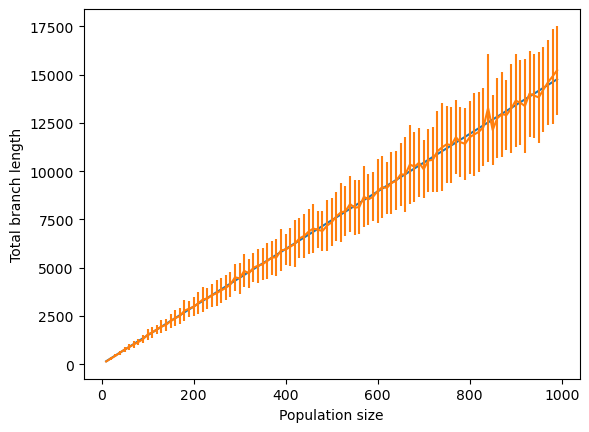

In [192]:
# plot total branch length as a function of population size
sample_size = 1000
n_reps = 100
population_sizes = np.arange(10, 1000, 10)
mean_branch_lengths = []
std_branch_lengths = []
for population_size in population_sizes:
    mean, std = total_branch_length(sample_size, population_size, n_reps)
    mean_branch_lengths.append(mean)
    std_branch_lengths.append(std)

# fit linear model
A = np.vstack([population_sizes, np.ones(len(population_sizes))]).T
m, c = np.linalg.lstsq(A, mean_branch_lengths, rcond=None)[0]
print("Fitted slope:", m)
print("Fitted intercept:", c)

# plot

plt.plot(population_sizes, m * population_sizes + c, label="Fitted line")
plt.errorbar(population_sizes, mean_branch_lengths, yerr=std_branch_lengths)
plt.xlabel("Population size")
plt.ylabel("Total branch length")
plt.show()

Fitted slope: 2.0234369526651665
Fitted intercept: 0.9991145980119462


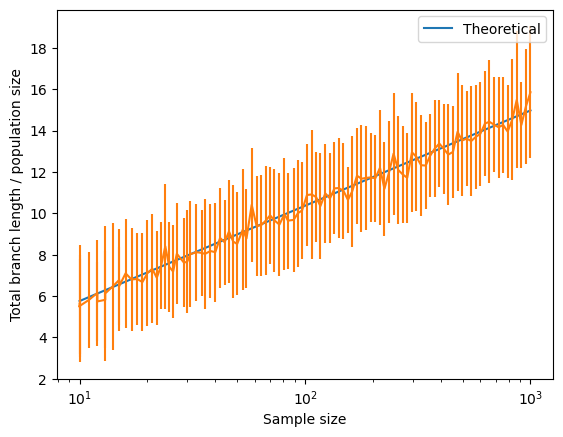

In [197]:
# plot total branch length as a function of sample size
population_size = 1
n_reps = 50
sample_sizes = np.logspace(1, 3, 100, dtype=int)
mean_branch_lengths = np.zeros(len(sample_sizes))
std_branch_lengths = np.zeros(len(sample_sizes))
for j, sample_size in enumerate(sample_sizes):
    mean, std = total_branch_length(sample_size, population_size, n_reps)
    mean_branch_lengths[j] = mean
    std_branch_lengths[j] = std

# fit linear model
A = np.vstack([np.log(sample_sizes), np.ones(len(sample_sizes))]).T
m, c = np.linalg.lstsq(A, mean_branch_lengths, rcond=None)[0]
print("Fitted slope:", m)
print("Fitted intercept:", c)

# theoretical expression
# E(B) = 2 * (1 + 1/2 + 1/3 + ... + 1/(n-1)) = 2 * H_{n-1}
# H_n = 1 + 1/2 + 1/3 + ... + 1/n
# H_n = log(n) + gamma + 1/(2n) - 1/(12n^2) + O(1/n^4)

# plot theoretical expression
plt.plot(sample_sizes, 2 * np.log(sample_sizes) + 2 * 0.5772, label="Theoretical")

# plot
# plt.plot(sample_sizes, m * np.log(sample_sizes) + c, label="Fitted line")
plt.errorbar(sample_sizes, mean_branch_lengths, yerr=std_branch_lengths)
plt.xscale("log")
plt.xlabel("Sample size")
plt.ylabel("Total branch length / population size")

plt.legend()
plt.show()